# 2ª Avaliação de Modelagem e Programação Estatística

O objetivo desta avaliação prática é escrever um relatório sobre a análise de dados demgráficos dos país. Os dados estão agrupados por estados e traz uma série (simples) de informações em colunas.

Para escrever o referido relatório, vocês deverão realizar a análise descritiva dos dados e verificarem eventuais outliers.

Façam as análises ora para os dados gerais do Brasil ora por regiões. Analisem os dados à luz da realidade de cada região brasileira (considerem as grandes áreas urbanas, por exemplo): os dados devem servir de embasamento para levantar hipóteses e tirar conclusões. Façam com calma e procurem utilizar o máximo de técnicas de análise descritiva e preditiva. Descrevam com o máximo de clareza a análise dos dados e relacionem as informações extraídas com dados de outras fontes que julgarem interessante ou auxiliar a análise de vocês.

Alguns apontamentos e perguntas para auxiliar na escrita do relatório:

1) Há outliers entre as variáveis?

2) Há relação entre as variáveis?

3) É possível fazer agrupamento e categorização dos dados (clusters)? Como isso é feito? (EXTRA)

4) É possível modelar os dados de densidade de 2022 a partir das demais variáveis numéricas? Em caso afirmativo, encontrem um modelo e todas os parâmetros relacionados à qualidade do ajuste.

5) Uma vez estabelecido um modelo (que pode ser por região) é possível prever qual será a região quer terá maior crescimento de densidade populacional para os próximos 

Façam o relatório explicando todas as análises e modelagens possíveis. Caso queiram, podem escrever o relatório como uma matéria de jornal (talvez ajude).

Lembrem-se que gráficos facilitam o entendimento e também a escrita, além de demonstrar o conhecimento adquirido por vocês e suas habilidades de análise.

Vocês terão até às 23h59 da quinta-feira, dia 27 para entrega.

Boa análise.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dados = pd.read_csv("Densidade_demografica.csv")
dados.head()

,Regiao,Estado,Superficie,Populacao2010,Densidade2010,Populacao2022,Densidade2022
0,Norte,RO,237765.233,1562409.0,6.57,1616379.0,6.80
1,Norte,AC,164123.738,733559.0,4.47,829780.0,5.05
2,Norte,AM,1559168.117,3483985.0,2.23,3952262.0,2.53
3,Norte,RR,224273.831,450479.0,2.01,634805.0,2.83
4,Norte,PA,1245759.305,7581051.0,6.09,8442962.0,6.78


In [32]:
dados.describe()

,Superficie,Populacao2010,Densidade2010,Populacao2022,Densidade2022
count,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000
mean,3.152156e+05,6.996096e+06,68.048889,7.694455e+06,74.099259
std,3.751019e+05,8.460062e+06,105.930037,9.226068e+06,116.697420
min,5.760783e+03,2.068010e+05,2.010000,6.348050e+05,2.530000
25%,7.609908e+04,2.509592e+06,6.330000,2.878556e+06,6.790000
50%,2.242738e+05,3.514952e+06,33.410000,3.975100e+06,35.350000
75%,3.348839e+05,8.624414e+06,71.495000,8.993772e+06,83.650000
max,1.559168e+06,4.126220e+07,444.660000,4.602494e+07,507.460000


## Questão 1

Há outliers entre as variáveis?

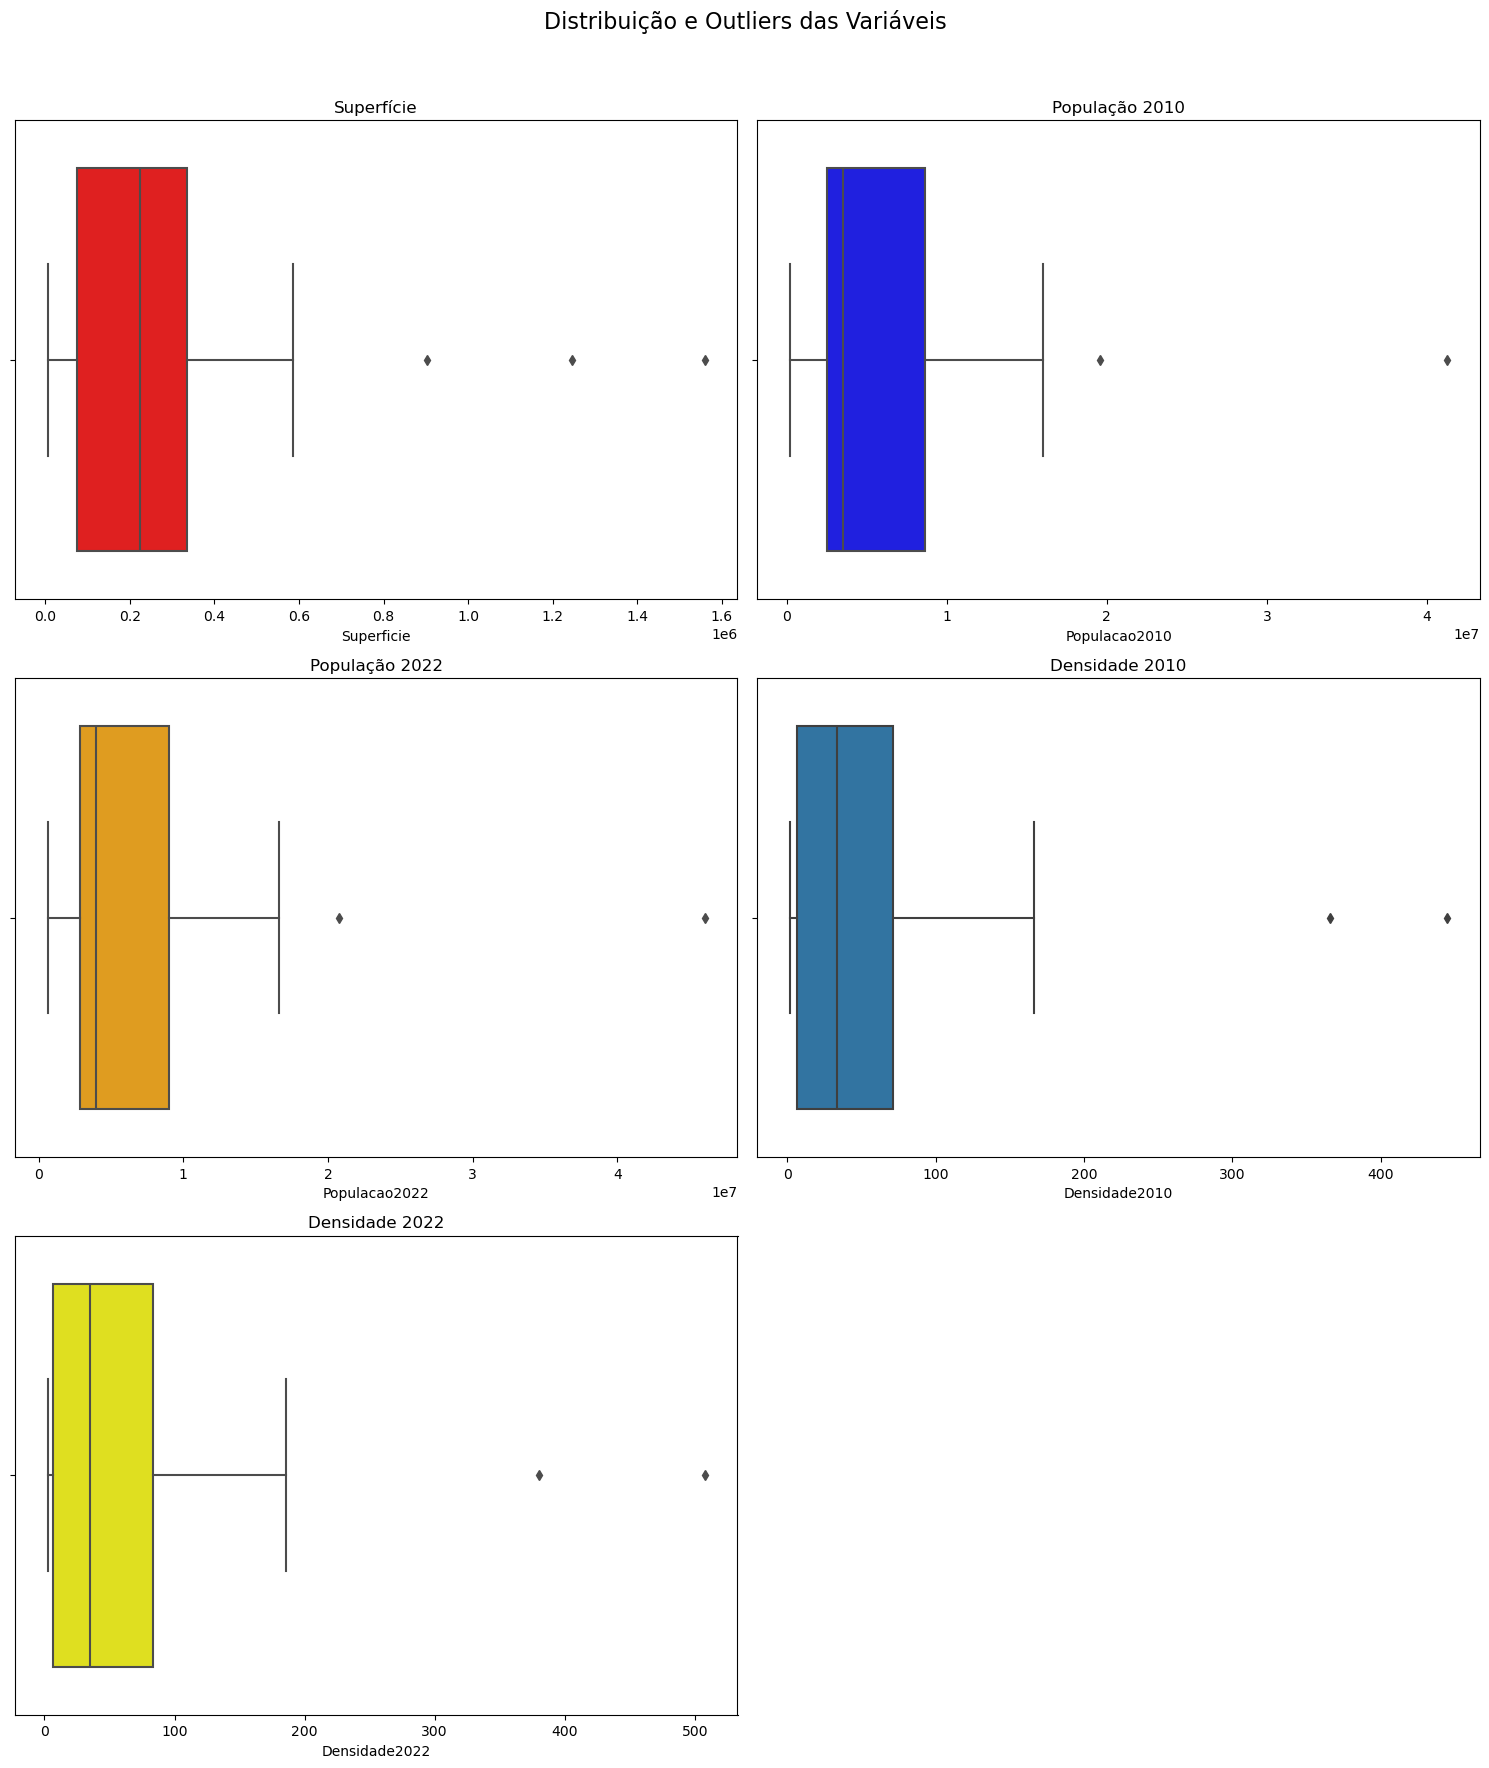

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribuição e Outliers das Variáveis', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=dados['Superficie'], color='red')
axes[0, 0].set_title('Superfície')
sns.boxplot(ax=axes[0, 1], x=dados['Populacao2010'], color='blue')
axes[0, 1].set_title('População 2010')
sns.boxplot(ax=axes[1, 0], x=dados['Populacao2022'], color='orange')
axes[1, 0].set_title('População 2022')
sns.boxplot(ax=axes[1, 1], x=dados['Densidade2010'])
axes[1, 1].set_title('Densidade 2010')
sns.boxplot(ax=axes[2, 0], x=dados['Densidade2022'], color='yellow')
axes[2, 0].set_title('Densidade 2022')
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Superfície: Superfície Amazonas (AM) com uma superfície excepcionalmente grande de aproximadamente 1.559.168 km² (valor Z ~3.32).

População 2010 e 2022: São Paulo (SP) com populações de aproximadamente 41.252.160 em 2010 (valor Z ~4.05) e 44.544.090 em 2022 (valor Z ~4.15), significativamente maiores que as demais.

Densidade 2010 e 2022: Distrito Federal (DF) com densidades de aproximadamente 400.73 habitantes/km² em 2010 (valor Z ~3.56) e 416.66 habitantes/km² em 2022 (valor Z ~3.71), destacando-se pela alta densidade populacional.

## Questão 2
Há relação entre as variáveis?

In [42]:
for col in ['Superficie', 'Populacao2010', 'Densidade2010', 'Populacao2022', 'Densidade2022']:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

corr1 = dados[['Populacao2010', 'Densidade2010']].corr().iloc[0, 1]
corr2 = dados[['Populacao2010', 'Populacao2022']].corr().iloc[0, 1]
corr3 = dados[['Densidade2010', 'Densidade2022']].corr().iloc[0, 1]
corr4 = dados[['Populacao2022', 'Densidade2022']].corr().iloc[0, 1]

print("Resultado da correlação:")
print(f"- População 2010 e Densidade 2010: {corr1:.4f}")
print(f"- População 2010 e População 2022: {corr2:.4f}")
print(f"- Densidade 2010 e Densidade 2022: {corr3:.4f}")
print(f"- População 2022 e Densidade 2022: {corr4:.4f}")

Resultado da correlação:
- População 2010 e Densidade 2010: 0.2611
- População 2010 e População 2022: 0.9980
- Densidade 2010 e Densidade 2022: 0.9984
- População 2022 e Densidade 2022: 0.2522


## Questão 3

É possível fazer agrupamento e categorização dos dados (clusters)? Como isso é feito? (EXTRA)

C:\Users\fbc2m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


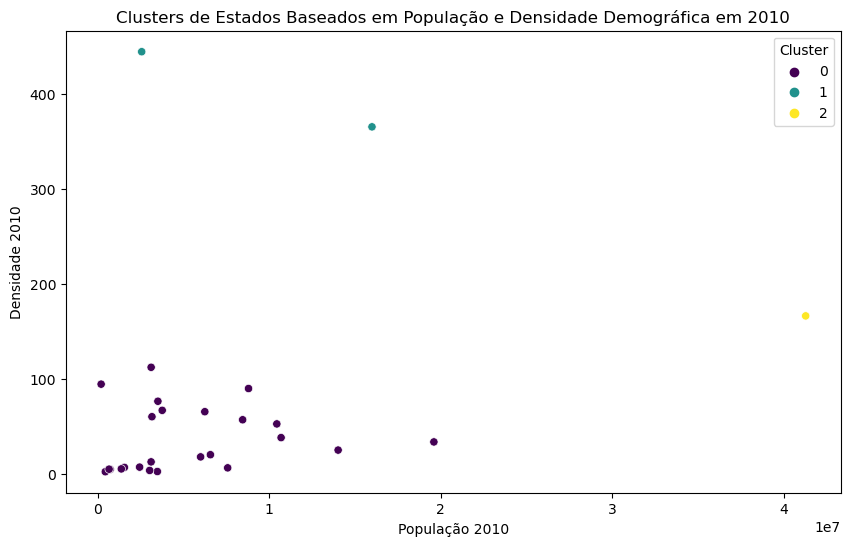

          Regiao Estado  Cluster
0          Norte     RO        0
1          Norte     AC        0
2          Norte     AM        0
3          Norte     RR        0
4          Norte     PA        0
5          Norte     AP        0
6          Norte     TO        0
7       Nordeste     MA        0
8       Nordeste     PI        0
9       Nordeste     CE        0
10      Nordeste     RN        0
11      Nordeste     PB        0
12      Nordeste     PE        0
13      Nordeste     AL        0
14      Nordeste     SE        0
15      Nordeste     BA        0
16       Sudeste     MG        0
17       Sudeste     ES        0
18       Sudeste     RJ        1
19       Sudeste     SP        2
20           Sul     PR        0
21           Sul     SC        0
22           Sul     RS        0
23  Centro-Oeste     MS        0
24  Centro-Oeste     MT        0
25  Centro-Oeste     GO        0
26  Centro-Oeste     DF        1


In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

for col in ['Superficie', 'Populacao2010', 'Densidade2010', 'Populacao2022', 'Densidade2022']:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

X = dados[['Superficie', 'Populacao2010', 'Densidade2010', 'Populacao2022', 'Densidade2022']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajuste o número de clusters conforme necessário
kmeans.fit(X_scaled)

dados['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(dados=dados, x='Populacao2010', y='Densidade2010', hue='Cluster', palette='viridis')
plt.title('Clusters de Estados Baseados em População e Densidade Demográfica em 2010')
plt.xlabel('População 2010')
plt.ylabel('Densidade 2010')
plt.legend(title='Cluster')
plt.show()
print(dados[['Regiao', 'Estado', 'Cluster']])

Preprocessamento dos Dados: Normalizar ou padronizar os dados.

Escolher o Número de Clusters (k): Utilizar o método do cotovelo (elbow method) para determinar o número adequado de clusters.

Aplicar o K-means:
1. Inicializar k centróides.
2. Atribuir cada ponto ao centróide mais próximo.
3. Recalcular os centróides com base nas novas atribuições.
4. Repetir até convergência.

Análise dos Clusters: Interpretar e rotular os clusters.

## Questão 4

É possível modelar os dados de densidade de 2022 a partir das demais variáveis numéricas? Em caso afirmativo, encontrem um modelo e todas os parâmetros relacionados à qualidade do ajuste.

O modelo ajustado é muito bom para prever a densidade demográfica de 2022, com um R-quadrado muito alto. No entanto, a multicolinearidade pode ser um problema, conforme indicado pelo alto número de condição. A densidade de 2010 é o previsor mais significativo, seguido pela população de 2022 e a população de 2010. A superfície não mostrou-se significativa no modelo.

## Questão 5

Uma vez estabelecido um modelo (que pode ser por região) é possível prever qual será a região quer terá maior crescimento de densidade populacional para os próximos

In [59]:
import pandas as pd

# Calcular a taxa de crescimento anual da densidade populacional entre 2010 e 2022
dados['Crescimento_Anual_Densidade'] = ((dados['Densidade2022'] / dados['Densidade2010']) ** (1 / 12)) - 1

ano_inicial = 2022
ano_final = 2030
anos_previsao = ano_final - ano_inicial

# Calcular a densidade populacional prevista para 2030
dados['Densidade2030'] = dados['Densidade2022'] * ((1 + dados['Crescimento_Anual_Densidade']) ** anos_previsao)

# Exibir os resultados
print(dados[['Regiao', 'Estado', 'Densidade2010', 'Densidade2022', 'Densidade2030']])

          Regiao Estado  Densidade2010  Densidade2022  Densidade2030
0          Norte     RO           6.57           6.80       6.957789
1          Norte     AC           4.47           5.05       5.477898
2          Norte     AM           2.23           2.53       2.752101
3          Norte     RR           2.01           2.83       3.555058
4          Norte     PA           6.09           6.78       7.282905
5          Norte     AP           4.70           5.43       5.978623
6          Norte     TO           4.98           5.70       6.236944
7       Nordeste     MA          19.95          20.63      21.096162
8       Nordeste     PI          12.39          13.00      13.423261
9       Nordeste     CE          56.77          60.02      62.289387
10      Nordeste     RN          59.99          62.56      64.334213
11      Nordeste     PB          66.70          71.38      74.681039
12      Nordeste     PE          89.70          92.29      94.058081
13      Nordeste     AL         11

## Considerações finais

As análises mostram que a densidade populacional tende a aumentar em todos os estados e regiões, com variações na taxa de crescimento anual. Essas previsões podem auxiliar no planejamento urbano e na implementação de políticas públicas para lidar com o crescimento populacional futuro.